## Model Explainability

- Interpret the model predictions globally and locally 
- Understand feature importance, SHAP values, and decision patterns
- Provide insights for stakeholder or regulatory compilance

In [1]:
# import the required libraries 

import pandas as pd 
import numpy as np

import joblib 

import shap 
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import plot_importance

/Users/rajendran/Desktop/real_time_fraud_detection_system_for_financial_transactions/real-time-fraud-detection-system-for-financial-transactions/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load the model and data 

# Paths
DATA_DIR = "../data/processed/"
artifact_path = "../models/final_xgb_with_threshold.joblib"

# Load trained artifact
artifact = joblib.load(artifact_path)
xgb_model = artifact['model']
threshold = artifact['threshold']

# Load test data
X_test = pd.read_parquet(DATA_DIR + "X_test.parquet")
y_test = pd.read_parquet(DATA_DIR + "y_test.parquet").values.ravel()

#### XGBoost Native Importance

<Figure size 1000x600 with 0 Axes>

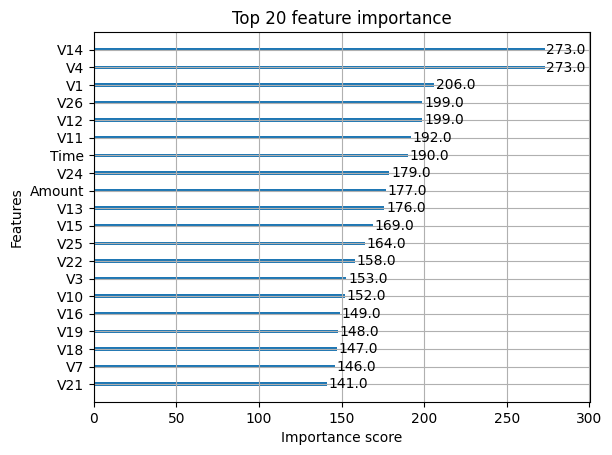

In [3]:
# XGBoost native importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=20, importance_type='weight')
plt.title("Top 20 feature importance")
save_path = "../reports/figures/16_top_20_feature_importance.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

#### SHAP Summary Plot (Global Explanation)

In [3]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

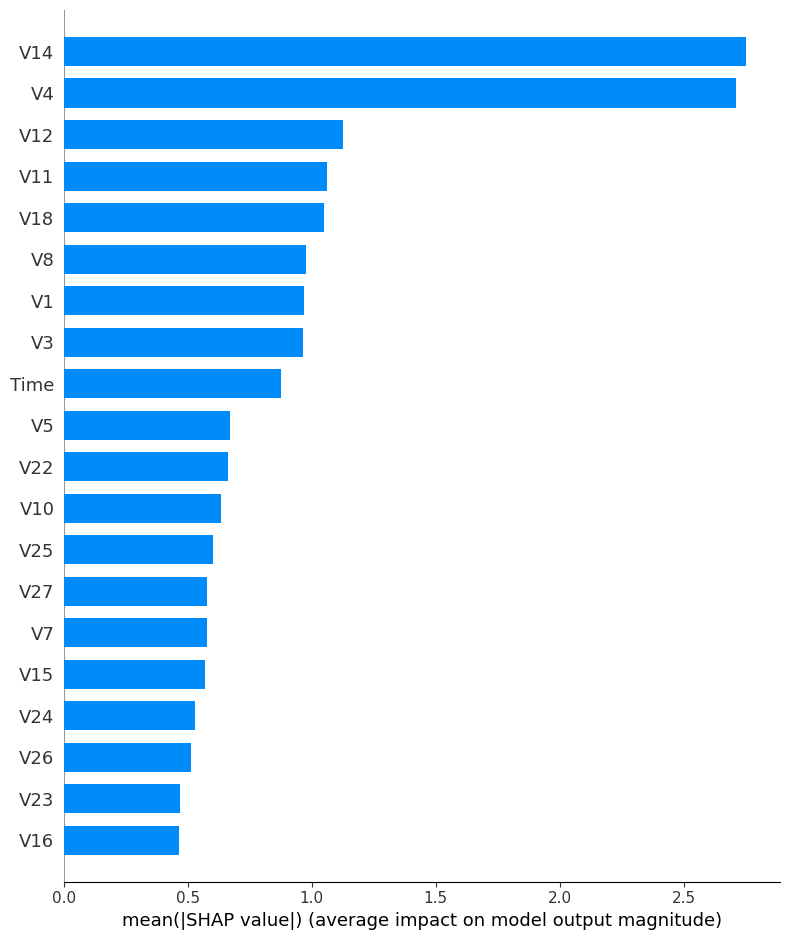

In [6]:
fig = shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)

# Save the figure
save_path = "../reports/figures/17_SHAP_values_for_feature_importance.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Bar plot shows average absolute SHAP value per feature (importance ranking).

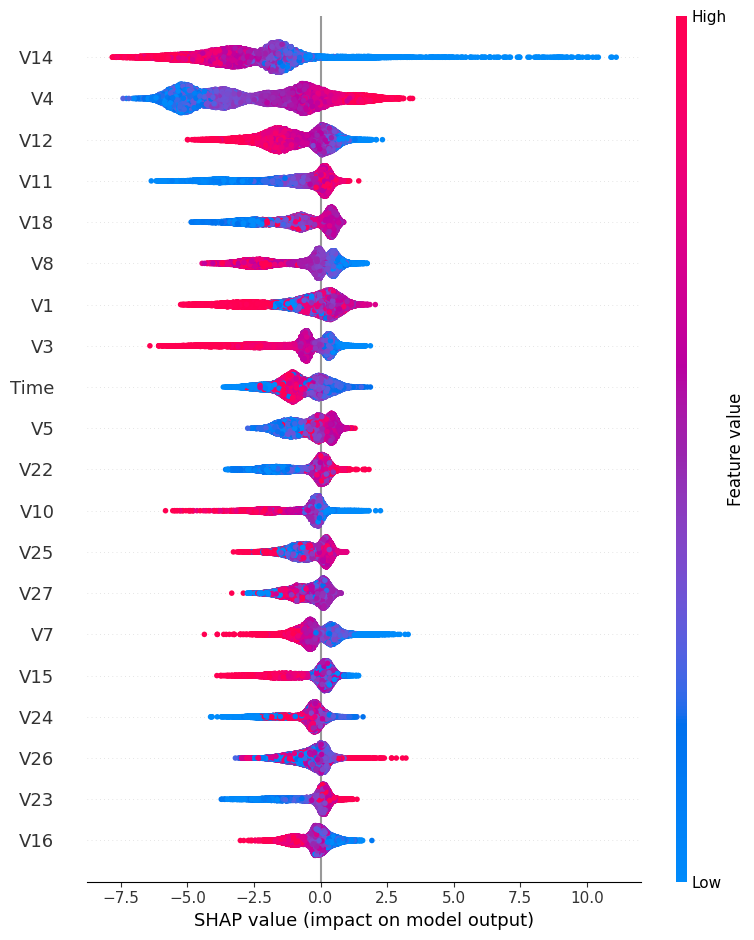

<Figure size 640x480 with 0 Axes>

In [7]:
# beeswarm plot shows feature effect distribution across all samples 

fig = shap.summary_plot(shap_values, X_test)

# Save the figure
save_path = "../reports/figures/18_SHAP_values_impact_on_model_output.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

#### Local Explanations

--------------- Explanation for sample 0 -------------


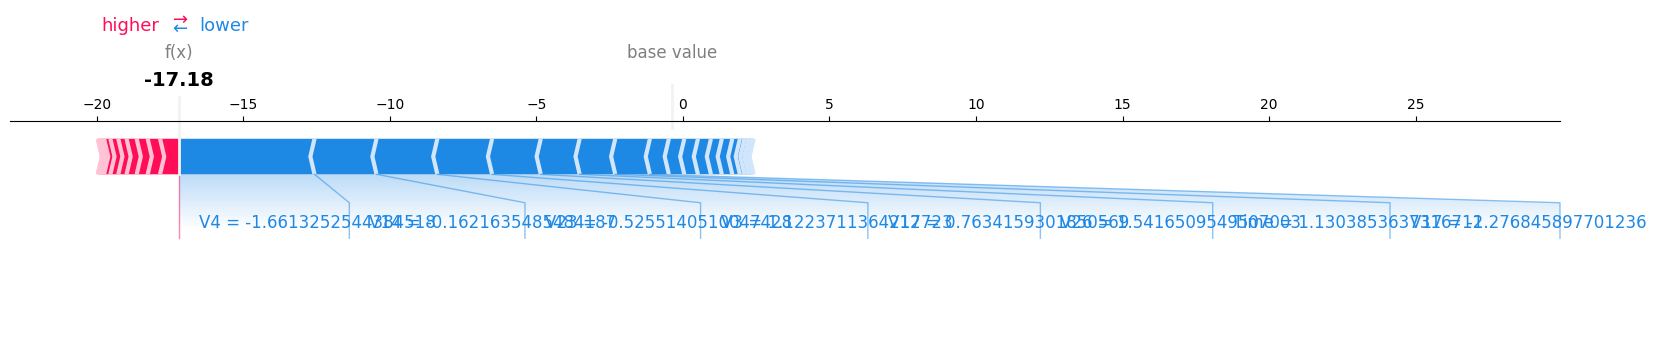

--------------- Explanation for sample 1 -------------


<Figure size 640x480 with 0 Axes>

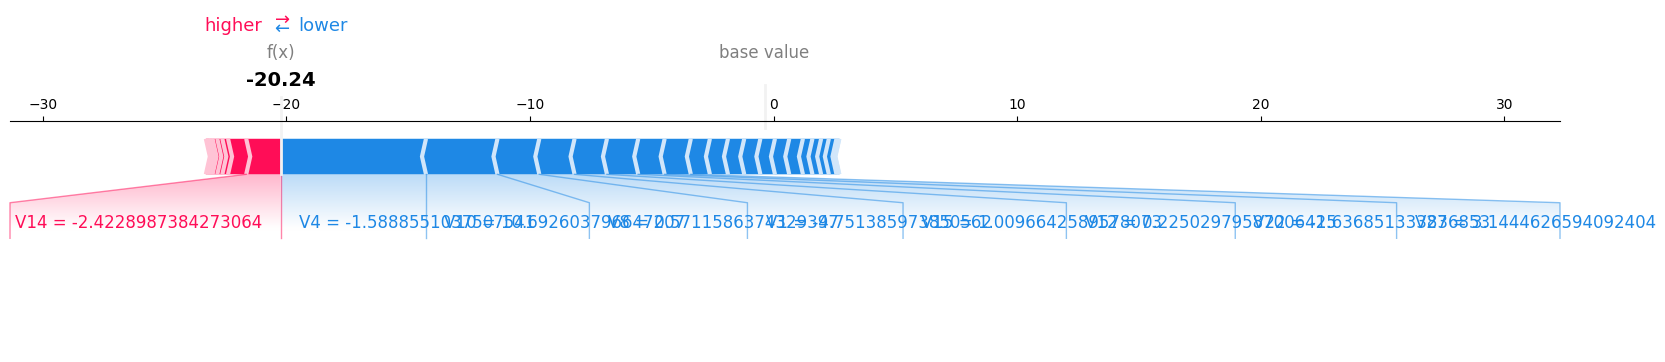

--------------- Explanation for sample 2 -------------


<Figure size 640x480 with 0 Axes>

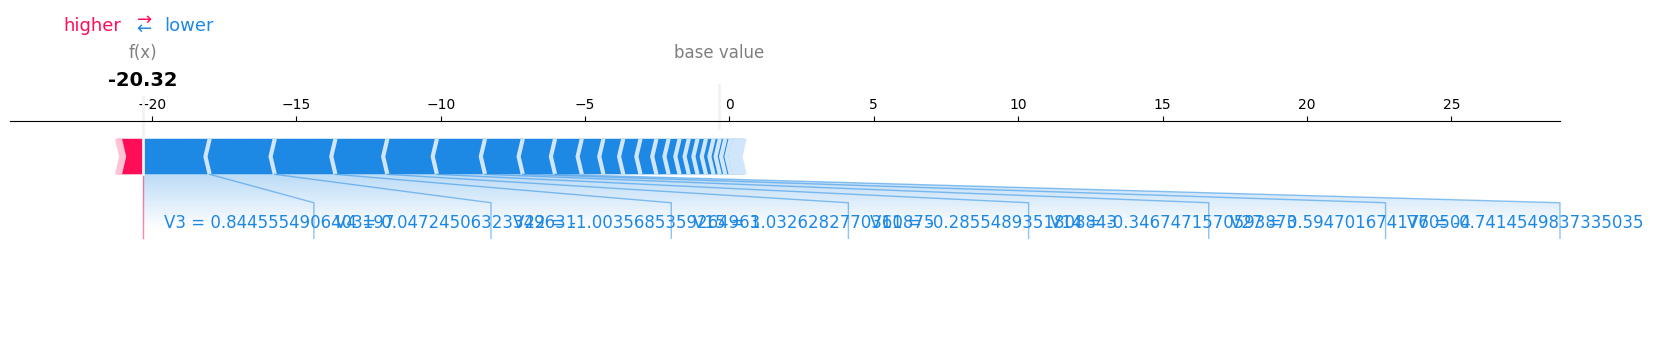

--------------- Explanation for sample 3 -------------


<Figure size 640x480 with 0 Axes>

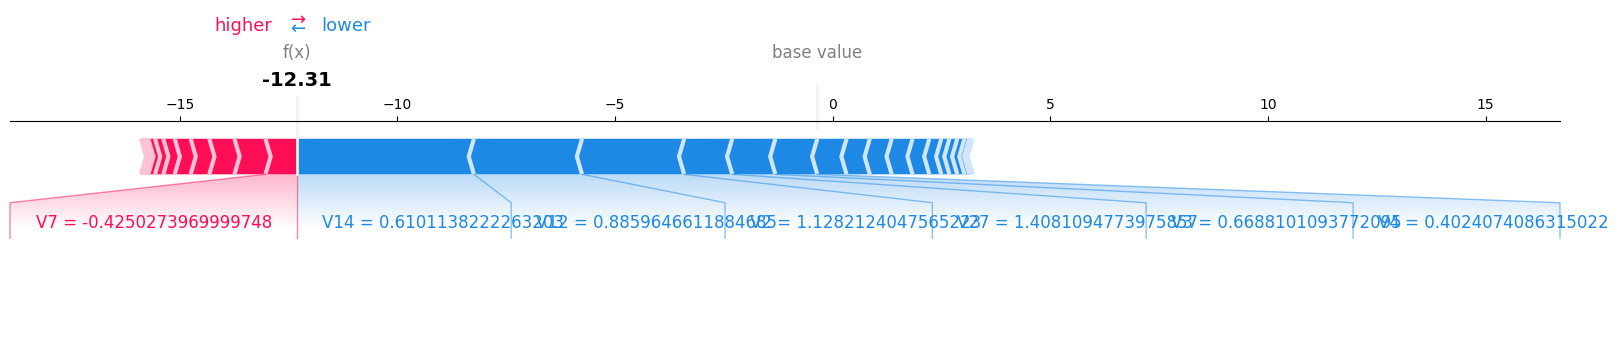

--------------- Explanation for sample 4 -------------


<Figure size 640x480 with 0 Axes>

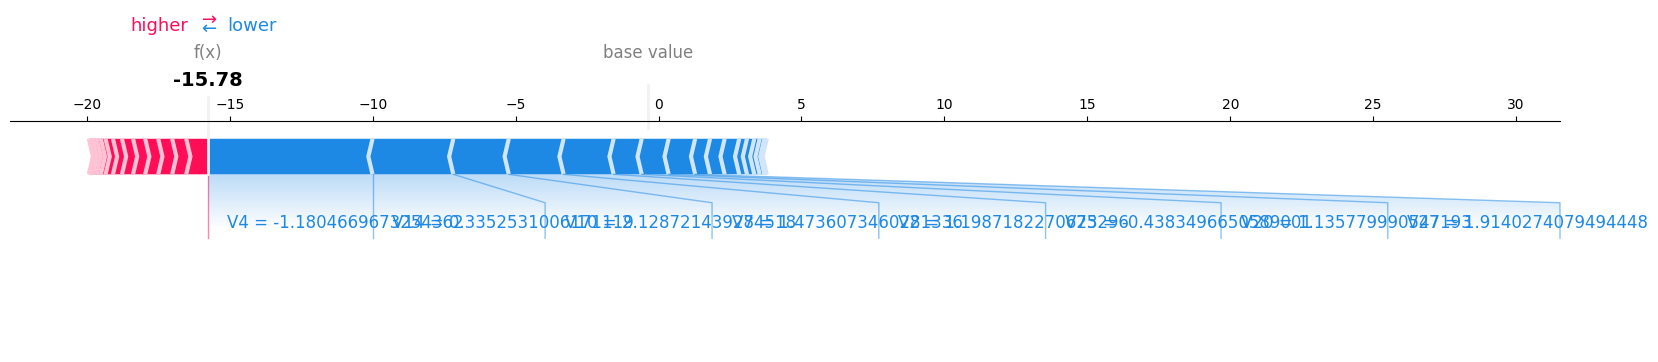

<Figure size 640x480 with 0 Axes>

In [8]:
# Make sure JS visualization is initialized (for notebook interactivity)
shap.initjs()

start_img_num = 19  # starting image number

for i in range(5):
    print(f"--------------- Explanation for sample {i} -------------")
    
    # Generate the force plot
    force_plot = shap.force_plot(
        explainer.expected_value, 
        shap_values[i], 
        X_test.iloc[i], 
        matplotlib=True
    )
    
    # Save the plot
    save_path = f"../reports/figures/{start_img_num + i}_shap_force_plot_sample_{i}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Clear the current figure to avoid overlapping plots
    plt.clf()


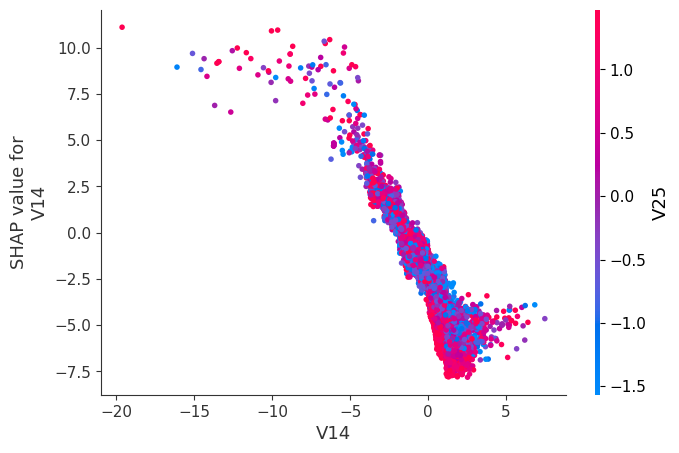

<Figure size 640x480 with 0 Axes>

In [9]:
# dependence plots 
# Feature interaction insight
fig = shap.dependence_plot("V14", shap_values, X_test)
# Save the figure
save_path = "../reports/figures/24_SHAP_values_for_feature_interactions.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [16]:
# save the outputs 

OUTPUT_DATA_DIR = '../data/outputs/'


# Save SHAP values for future analysis
np.save(DATA_DIR + "shap_values.npy", shap_values)
print(f"SHAP values saved to {DATA_DIR}shap_values.npy")

SHAP values saved to ../data/processed/shap_values.npy
